In [2]:
import pandas as pd
import os
import tensorflow as tf
import numpy as np
from Modules.data_processing import sample_data, split_data, get_statistics, preprocess_books, shorten_sessions

/Users/kostaseckar/Desktop/HSE/RL_based_RecSys_clone/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
n_sessions = 5000
# sorted_events = sample_data('data', 'events.csv')
sorted_events = pd.read_csv('data/sorted_events.csv')
ch_sorted_events, itm2idx = shorten_sessions(sorted_events, n_sessions=n_sessions)
train_df, val_df, test_df = split_data(ch_sorted_events)
replay_buf, data_stats = get_statistics(ch_sorted_events, train_df)

unique: 12909 min: 0 max: 12908


In [7]:
data_stats

,state_size,item_num
0,10,12909


In [8]:
from Modules.train import train, test

In [10]:
from Modules.misc import last_results, plot_validation

# DQN

In [12]:
arg_dict = {'r_click' : 0.2,
            'r_buy' : 1,
            'r_negative' : 1,
            'hidden_factor' : 64,
            'lr' : 0.001,
            'epoch' : 50,
            'batch_size' : 256,
            'neg' : 10,
            'discount' : 0.5
            }
results_dqn = []
losses_dqn = []
DQN_1, sess_DQN = train(data_stats, replay_buf, val_df, arg_dict=arg_dict, results=results_dqn, losses=losses_dqn)

Instructions for updating:
non-resource variables are not supported in the long term


/Users/kostaseckar/Desktop/HSE/RL_based_RecSys_clone/MY/RL_RECSYS.py:95: UserWarning: `tf.layers.dropout` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dropout` instead.
  self.seq = tf.compat.v1.layers.dropout(self.seq,
/Users/kostaseckar/Desktop/HSE/RL_based_RecSys_clone/MY/SASRecModules.py:142: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  Q = tf.compat.v1.layers.dense(queries, num_units, activation=None) # (N, T_q, C)
/Users/kostaseckar/Desktop/HSE/RL_based_RecSys_clone/MY/SASRecModules.py:143: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  K = tf.compat.v1.layers.dense(keys, num_units, activation=None) # (N, T_k, C)
/Users/kostaseckar/Desktop/HSE/RL_based_RecSys_clone/MY/SASRecModules.py:144: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version.

#############################################################
total clicks: 3193, total purchase:111
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 5: 0.000000
clicks hr ndcg @ 5 : 0.000000, 0.000000
purchase hr and ndcg @5 : 0.000000, 0.000000
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 10: 0.400000
clicks hr ndcg @ 10 : 0.000626, 0.000206
purchase hr and ndcg @10 : 0.000000, 0.000000
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 15: 1.000000
clicks hr ndcg @ 15 : 0.001566, 0.000458
purchase hr and ndcg @15 : 0.000000, 0.000000
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 20: 1.400000
clicks hr ndcg @ 20 : 0.002192, 0.000607
purchase hr and ndcg @20 : 0.000000, 0.000000
#############################################################
the loss in 50th batch is: 4.599920
the loss in 100th batch is: 2.922878
the loss in 150th batch is: 1.539388
th

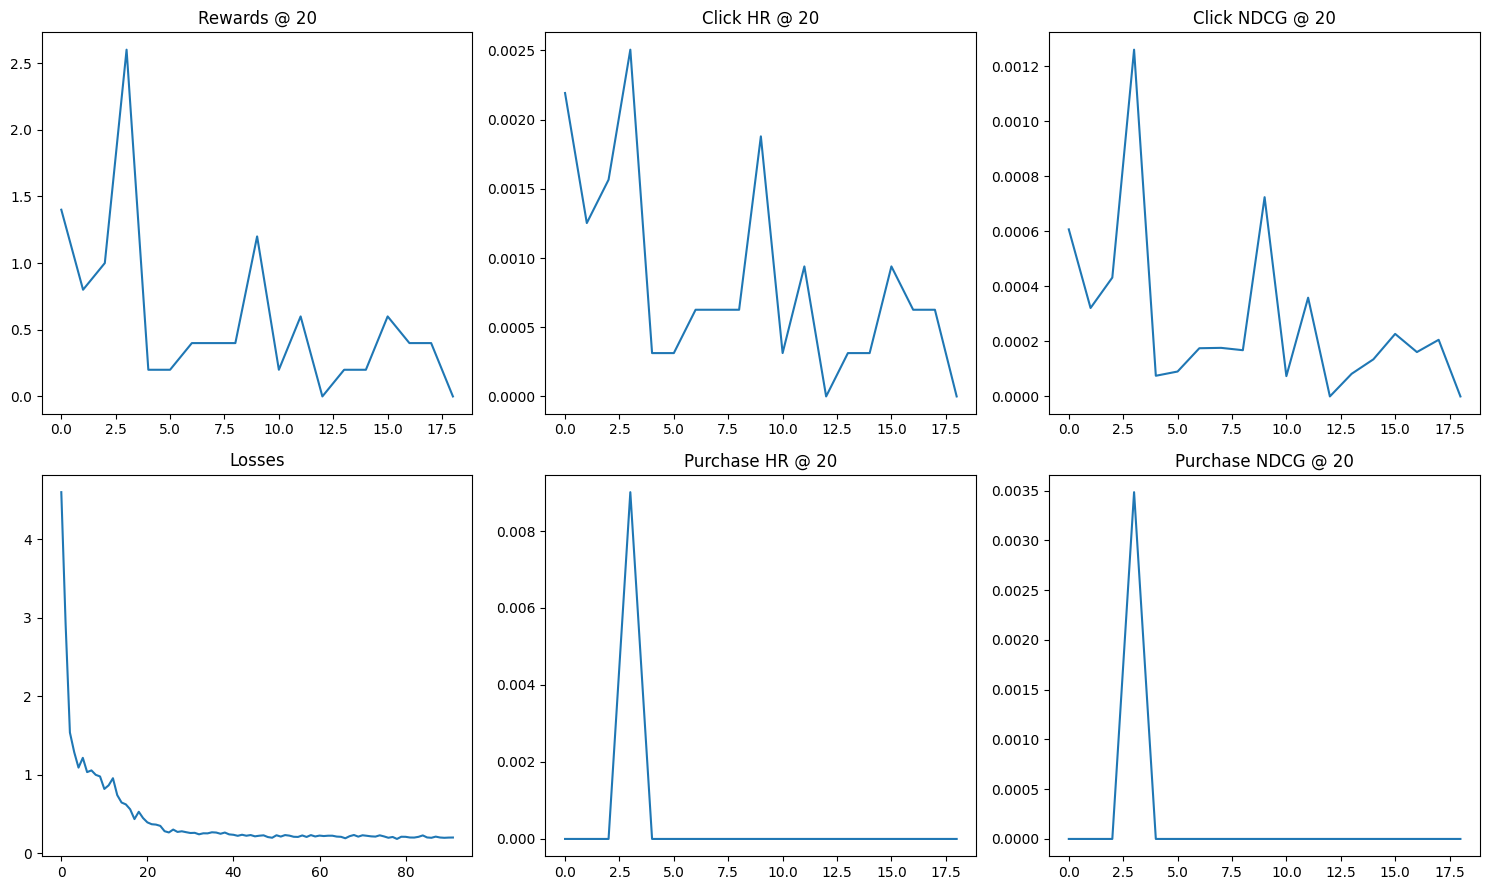

In [13]:
plot_validation(losses_dqn, results_dqn, at=20)

In [14]:
VAL_RESULTS_DQN = last_results(results_dqn)

In [15]:
test_results_DQN = []
test(sess_DQN, DQN_1, data_stats, test_df, test_results_DQN)

#############################################################
total clicks: 2803, total purchase:91
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 5: 0.400000
clicks hr ndcg @ 5 : 0.000714, 0.000332
purchase hr and ndcg @5 : 0.000000, 0.000000
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 10: 0.800000
clicks hr ndcg @ 10 : 0.001427, 0.000578
purchase hr and ndcg @10 : 0.000000, 0.000000
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 15: 1.000000
clicks hr ndcg @ 15 : 0.001784, 0.000674
purchase hr and ndcg @15 : 0.000000, 0.000000
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 20: 1.000000
clicks hr ndcg @ 20 : 0.001784, 0.000674
purchase hr and ndcg @20 : 0.000000, 0.000000
#############################################################


# SNQN

In [16]:

arg_dict = {'r_click' : 0.2,
            'r_buy' : 1,
            'r_negative' : 1,
            'hidden_factor' : 64,
            'lr' : 0.005,
            'epoch' : 100,
            'batch_size' : 256,
            'neg' : 10,
            'discount' : 0.5
            }
results_snqn = []
losses_snqn = []
SNQN_1, sess_SNQN = train(data_stats, replay_buf, val_df, arg_dict=arg_dict, results=results_snqn, losses=losses_snqn, configuration='SNQN')

/Users/kostaseckar/Desktop/HSE/RL_based_RecSys_clone/MY/RL_RECSYS.py:95: UserWarning: `tf.layers.dropout` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dropout` instead.
  self.seq = tf.compat.v1.layers.dropout(self.seq,
/Users/kostaseckar/Desktop/HSE/RL_based_RecSys_clone/MY/SASRecModules.py:142: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  Q = tf.compat.v1.layers.dense(queries, num_units, activation=None) # (N, T_q, C)
/Users/kostaseckar/Desktop/HSE/RL_based_RecSys_clone/MY/SASRecModules.py:143: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  K = tf.compat.v1.layers.dense(keys, num_units, activation=None) # (N, T_k, C)
/Users/kostaseckar/Desktop/HSE/RL_based_RecSys_clone/MY/SASRecModules.py:144: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version.

#############################################################
total clicks: 3193, total purchase:111
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 5: 0.400000
clicks hr ndcg @ 5 : 0.000626, 0.000332
purchase hr and ndcg @5 : 0.000000, 0.000000
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 10: 0.400000
clicks hr ndcg @ 10 : 0.000626, 0.000332
purchase hr and ndcg @10 : 0.000000, 0.000000
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 15: 1.000000
clicks hr ndcg @ 15 : 0.001566, 0.000585
purchase hr and ndcg @15 : 0.000000, 0.000000
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 20: 1.800000
clicks hr ndcg @ 20 : 0.002819, 0.000874
purchase hr and ndcg @20 : 0.000000, 0.000000
#############################################################
the loss in 50th batch is: 12.880428
the loss in 100th batch is: 10.808000
the loss in 150th batch is: 10.525022

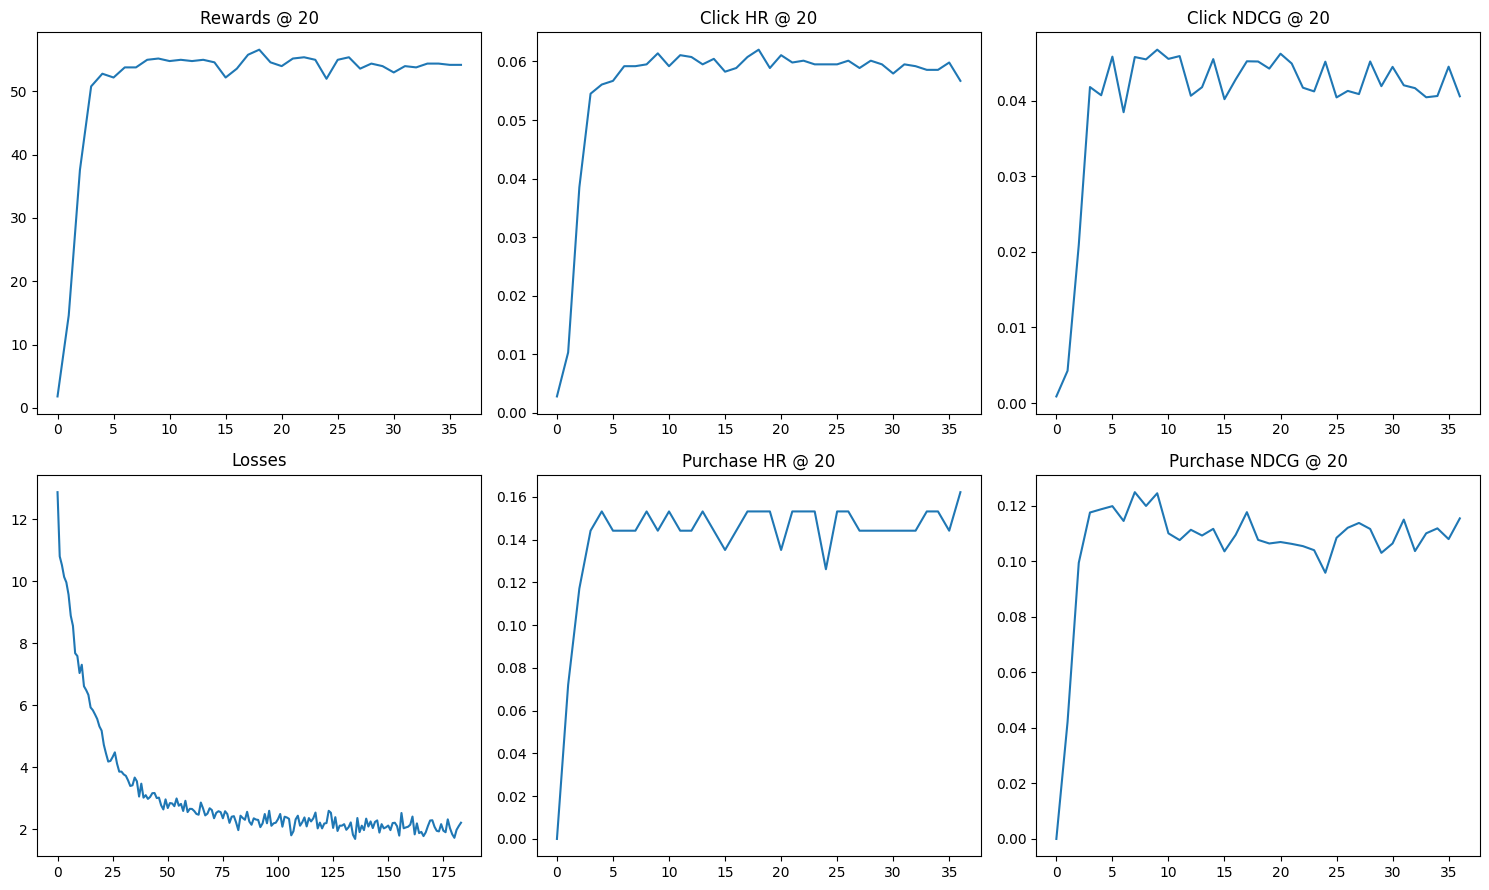

In [17]:
plot_validation(losses_snqn, results_snqn)

In [18]:
VAL_RESULTS_SNQN = last_results(results_snqn)

In [19]:
test_results_SNQN = []
test(sess_SNQN, SNQN_1, data_stats, test_df, test_results_SNQN)

#############################################################
total clicks: 2803, total purchase:91
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 5: 46.000000
clicks hr ndcg @ 5 : 0.062433, 0.049428
purchase hr and ndcg @5 : 0.120879, 0.088784
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 10: 52.000000
clicks hr ndcg @ 10 : 0.071352, 0.052297
purchase hr and ndcg @10 : 0.131868, 0.092699
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 15: 54.600000
clicks hr ndcg @ 15 : 0.074206, 0.053059
purchase hr and ndcg @15 : 0.142857, 0.095585
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 20: 55.400000
clicks hr ndcg @ 20 : 0.075633, 0.053393
purchase hr and ndcg @20 : 0.142857, 0.095585
#############################################################


# SA2C

In [20]:
from MY.data_processing import create_pop_dict

create_pop_dict()

9.0
20.0
1.0
27.0
21.0
18.0
15.0
16.0
26.0


In [21]:
arg_dict = {'r_click' : 0.2,
            'r_buy' : 1,
            'r_negative' : 1,
            'hidden_factor' : 64,
            'lr' : 0.005,
            'lr2' : 0.001,
            'epoch' : 100,
            'batch_size' : 256,
            'neg' : 10,
            'discount' : 0.5,
            'smooth' : 0.0,
            'clip' : 0.0
            }
results_sa2c = []
losses_sa2c = []
SA2C_1, sess_sa2c  = train(data_stats, replay_buf, val_df, arg_dict=arg_dict, results=results_sa2c, losses=losses_sa2c, configuration='SA2C')


/Users/kostaseckar/Desktop/HSE/RL_based_RecSys_clone/MY/RL_RECSYS.py:95: UserWarning: `tf.layers.dropout` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dropout` instead.
  self.seq = tf.compat.v1.layers.dropout(self.seq,
/Users/kostaseckar/Desktop/HSE/RL_based_RecSys_clone/MY/SASRecModules.py:142: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  Q = tf.compat.v1.layers.dense(queries, num_units, activation=None) # (N, T_q, C)
/Users/kostaseckar/Desktop/HSE/RL_based_RecSys_clone/MY/SASRecModules.py:143: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  K = tf.compat.v1.layers.dense(keys, num_units, activation=None) # (N, T_k, C)
/Users/kostaseckar/Desktop/HSE/RL_based_RecSys_clone/MY/SASRecModules.py:144: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version.

#############################################################
total clicks: 3193, total purchase:111
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 5: 0.400000
clicks hr ndcg @ 5 : 0.000626, 0.000291
purchase hr and ndcg @5 : 0.000000, 0.000000
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 10: 2.000000
clicks hr ndcg @ 10 : 0.001566, 0.000588
purchase hr and ndcg @10 : 0.009009, 0.003003
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 15: 2.400000
clicks hr ndcg @ 15 : 0.002192, 0.000755
purchase hr and ndcg @15 : 0.009009, 0.003003
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 20: 2.400000
clicks hr ndcg @ 20 : 0.002192, 0.000755
purchase hr and ndcg @20 : 0.009009, 0.003003
off-line corrected evaluation (click_ng,purchase_ng) @10: 0.000681, 0.001554
#############################################################
the loss in 50th batch is: 12.37760

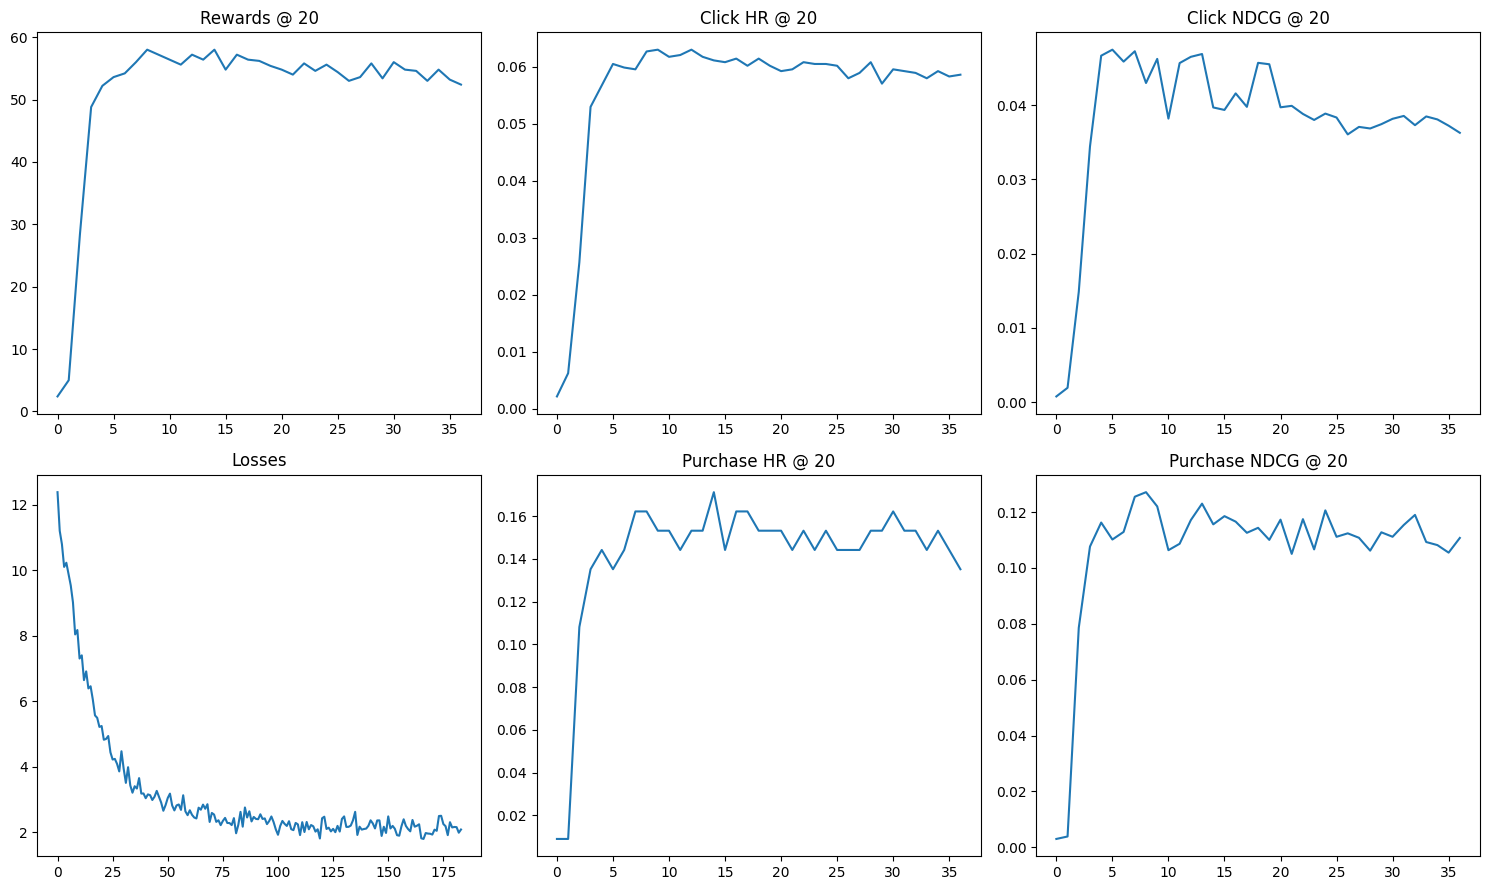

In [22]:
plot_validation(losses_sa2c, results_sa2c) 

In [23]:
VAL_RESULTS_SA2C = last_results(results_sa2c)

In [24]:
test_results_SA2C = []
test(sess_sa2c, SA2C_1, data_stats, test_df, test_results_SA2C)

#############################################################
total clicks: 2803, total purchase:91
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 5: 44.200000
clicks hr ndcg @ 5 : 0.057438, 0.046077
purchase hr and ndcg @5 : 0.131868, 0.097573
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 10: 51.000000
clicks hr ndcg @ 10 : 0.067785, 0.049536
purchase hr and ndcg @10 : 0.142857, 0.100749
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 15: 53.200000
clicks hr ndcg @ 15 : 0.071709, 0.050561
purchase hr and ndcg @15 : 0.142857, 0.100749
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 20: 54.200000
clicks hr ndcg @ 20 : 0.073493, 0.050989
purchase hr and ndcg @20 : 0.142857, 0.100749
off-line corrected evaluation (click_ng,purchase_ng) @10: 0.041498, 0.098932
#############################################################


## Comparison

### Validation last step

In [25]:
print('DQN: \n', VAL_RESULTS_DQN)

DQN: 
 Rewards:
 @5 : 0 @10 : 0 @15 : 0 @20 : 0

Click HR:
 @5 : 0.0 @10 : 0.0 @15 : 0.0 @20 : 0.0

Click NDCG:
 @5 : 0.0 @10 : 0.0 @15 : 0.0 @20 : 0.0

Purchase HR:
 @5 : 0.0 @10 : 0.0 @15 : 0.0 @20 : 0.0

Purchase NDCG:
 @5 : 0.0 @10 : 0.0 @15 : 0.0 @20 : 0.0


In [26]:
print('SNQN: \n', VAL_RESULTS_SNQN)

SNQN: 
 Rewards:
 @5 : 45.20000000000005 @10 : 51.80000000000014 @15 : 54.00000000000017 @20 : 54.20000000000017

Click HR:
 @5 : 0.04885687441277795 @10 : 0.054494206075790794 @15 : 0.05637331663012841 @20 : 0.05668650172251801

Click NDCG:
 @5 : 0.038126459095143755 @10 : 0.0400180815682253 @15 : 0.040523861862308434 @20 : 0.040597588424590506

Purchase HR:
 @5 : 0.12612612612612611 @10 : 0.15315315315315314 @15 : 0.16216216216216217 @20 : 0.16216216216216217

Purchase NDCG:
 @5 : 0.10437230023360976 @10 : 0.11313538185124698 @15 : 0.11544131000268676 @20 : 0.11544131000268676


In [27]:
print('SA2C: \n', VAL_RESULTS_SA2C)

SA2C: 
 Rewards:
 @5 : 44.40000000000004 @10 : 49.00000000000009 @15 : 51.600000000000136 @20 : 52.40000000000015

Click HR:
 @5 : 0.047604134043219545 @10 : 0.05324146570623239 @15 : 0.05731287190729721 @20 : 0.058565612276855625

Click NDCG:
 @5 : 0.03307951044558412 @10 : 0.03489214549782686 @15 : 0.03597620037297482 @20 : 0.03627006211490978

Purchase HR:
 @5 : 0.12612612612612611 @10 : 0.13513513513513514 @15 : 0.13513513513513514 @20 : 0.13513513513513514

Purchase NDCG:
 @5 : 0.10803858441187607 @10 : 0.11075056635479483 @15 : 0.11075056635479483 @20 : 0.11075056635479483


### Test

In [28]:
print("DQN:", test_results_DQN)

DQN: [{5: {'reward': 0.4, 'click hr': 0.0007135212272565109, 'click ndcg': 0.00033202873994769643, 'purchase hr': 0.0, 'purchase ndcg': 0.0}, 10: {'reward': 0.8, 'click hr': 0.0014270424545130217, 'click ndcg': 0.000578029639141901, 'purchase hr': 0.0, 'purchase ndcg': 0.0}, 15: {'reward': 1.0, 'click hr': 0.0017838030681412772, 'click ndcg': 0.0006744399689411588, 'purchase hr': 0.0, 'purchase ndcg': 0.0}, 20: {'reward': 1.0, 'click hr': 0.0017838030681412772, 'click ndcg': 0.0006744399689411588, 'purchase hr': 0.0, 'purchase ndcg': 0.0}}]


In [29]:
print("SNQN:", test_results_SNQN)

SNQN: [{5: {'reward': 46.00000000000005, 'click hr': 0.0624331073849447, 'click ndcg': 0.04942766145205777, 'purchase hr': 0.12087912087912088, 'purchase ndcg': 0.08878449310385549}, 10: {'reward': 52.00000000000007, 'click hr': 0.07135212272565108, 'click ndcg': 0.05229658295470399, 'purchase hr': 0.13186813186813187, 'purchase ndcg': 0.09269885779735024}, 15: {'reward': 54.6000000000001, 'click hr': 0.07420620763467713, 'click ndcg': 0.05305945276785594, 'purchase hr': 0.14285714285714285, 'purchase ndcg': 0.09558511642413257}, 20: {'reward': 55.40000000000011, 'click hr': 0.07563325008919015, 'click ndcg': 0.053392763449907836, 'purchase hr': 0.14285714285714285, 'purchase ndcg': 0.09558511642413257}}]


In [30]:
print("SA2C:", test_results_SA2C)

SA2C: [{5: {'reward': 44.20000000000003, 'click hr': 0.057438458794149126, 'click ndcg': 0.04607731970793563, 'purchase hr': 0.13186813186813187, 'purchase ndcg': 0.09757291952695368}, 10: {'reward': 51.00000000000007, 'click hr': 0.06778451658936853, 'click ndcg': 0.04953613102505831, 'purchase hr': 0.14285714285714285, 'purchase ndcg': 0.10074945607989749, 'off-line click ndcg': 0.041498224910989895, 'off-line purchase ndcg': 0.09893160145709827}, 15: {'reward': 53.2000000000001, 'click hr': 0.07170888333927934, 'click ndcg': 0.050561244216922575, 'purchase hr': 0.14285714285714285, 'purchase ndcg': 0.10074945607989749}, 20: {'reward': 54.20000000000012, 'click hr': 0.07349268640742063, 'click ndcg': 0.05098946549074792, 'purchase hr': 0.14285714285714285, 'purchase ndcg': 0.10074945607989749}}]


# Dataset with books

In [ ]:
books_df, rated_books_df = preprocess_books('books_dataset/interactions.csv')
books_df = shorten_sessions(books_df, n_sessions=n_sessions)
books_train_df, books_val_df, books_test_df = split_data(books_df)
books_replay_buf, books_data_stats = get_statistics(books_df, books_train_df)
books_data_stats

In [ ]:
import matplotlib.pyplot as plt

### DQN

In [31]:
arg_dict_books = {'r_click' : 0.2,
            'r_buy' : 1,
            'r_negative' : 1,
            'hidden_factor' : 64,
            'lr' : 0.001,
            'epoch' : 30,
            'batch_size' : 256,
            'neg' : 10,
            'discount' : 0.5
            }
results_books = []
losses_books = []
QN_1_books, QN_2_books = train(books_data_stats, books_replay_buf, books_val_df, arg_dict=arg_dict_books, results=results_books, losses=losses_books, configuration='DQN')

/Users/kostaseckar/Desktop/HSE/RL_based_RecSys_clone/MY/RL_RECSYS.py:95: UserWarning: `tf.layers.dropout` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dropout` instead.
  self.seq = tf.compat.v1.layers.dropout(self.seq,
/Users/kostaseckar/Desktop/HSE/RL_based_RecSys_clone/MY/SASRecModules.py:142: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  Q = tf.compat.v1.layers.dense(queries, num_units, activation=None) # (N, T_q, C)
/Users/kostaseckar/Desktop/HSE/RL_based_RecSys_clone/MY/SASRecModules.py:143: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  K = tf.compat.v1.layers.dense(keys, num_units, activation=None) # (N, T_k, C)
/Users/kostaseckar/Desktop/HSE/RL_based_RecSys_clone/MY/SASRecModules.py:144: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version.

#############################################################
total clicks: 3402, total purchase:2362
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 5: 1.000000
clicks hr ndcg @ 5 : 0.000000, 0.000000
purchase hr and ndcg @5 : 0.000423, 0.000164
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 10: 1.200000
clicks hr ndcg @ 10 : 0.000294, 0.000098
purchase hr and ndcg @10 : 0.000423, 0.000164
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 15: 2.800000
clicks hr ndcg @ 15 : 0.001176, 0.000328
purchase hr and ndcg @15 : 0.000847, 0.000278
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 20: 3.000000
clicks hr ndcg @ 20 : 0.001470, 0.000399
purchase hr and ndcg @20 : 0.000847, 0.000278
#############################################################
the loss in 50th batch is: 4.762951
the loss in 100th batch is: 4.479054
the loss in 150th batch is: 2.345415
t

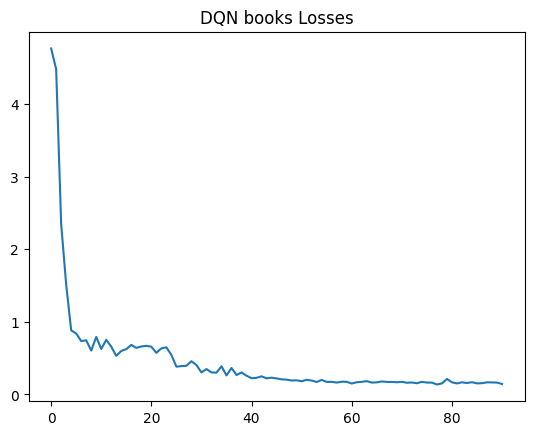

In [32]:
plt.plot(losses_books)
plt.title('DQN books Losses')
plt.show()

In [33]:
_ = last_results(results_books, print_out=True)

Rewards:
 @5 : 4 @10 : 4 @15 : 4 @20 : 4

Click HR:
 @5 : 0.0 @10 : 0.0 @15 : 0.0 @20 : 0.0

Click NDCG:
 @5 : 0.0 @10 : 0.0 @15 : 0.0 @20 : 0.0

Purchase HR:
 @5 : 0.001693480101608806 @10 : 0.001693480101608806 @15 : 0.001693480101608806 @20 : 0.001693480101608806

Purchase NDCG:
 @5 : 0.0007509337910538033 @10 : 0.0007509337910538033 @15 : 0.0007509337910538033 @20 : 0.0007509337910538033


### SNQN

/Users/kostaseckar/Desktop/HSE/RL_based_RecSys_clone/MY/RL_RECSYS.py:95: UserWarning: `tf.layers.dropout` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dropout` instead.
  self.seq = tf.compat.v1.layers.dropout(self.seq,
/Users/kostaseckar/Desktop/HSE/RL_based_RecSys_clone/MY/SASRecModules.py:142: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  Q = tf.compat.v1.layers.dense(queries, num_units, activation=None) # (N, T_q, C)
/Users/kostaseckar/Desktop/HSE/RL_based_RecSys_clone/MY/SASRecModules.py:143: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  K = tf.compat.v1.layers.dense(keys, num_units, activation=None) # (N, T_k, C)
/Users/kostaseckar/Desktop/HSE/RL_based_RecSys_clone/MY/SASRecModules.py:144: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version.

#############################################################
total clicks: 3402, total purchase:2362
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 5: 1.000000
clicks hr ndcg @ 5 : 0.000000, 0.000000
purchase hr and ndcg @5 : 0.000423, 0.000182
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 10: 1.400000
clicks hr ndcg @ 10 : 0.000588, 0.000183
purchase hr and ndcg @10 : 0.000423, 0.000182
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 15: 1.600000
clicks hr ndcg @ 15 : 0.000882, 0.000265
purchase hr and ndcg @15 : 0.000423, 0.000182
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 20: 1.600000
clicks hr ndcg @ 20 : 0.000882, 0.000265
purchase hr and ndcg @20 : 0.000423, 0.000182
#############################################################
the loss in 50th batch is: 14.301180
the loss in 100th batch is: 11.855904
the loss in 150th batch is: 11.73292

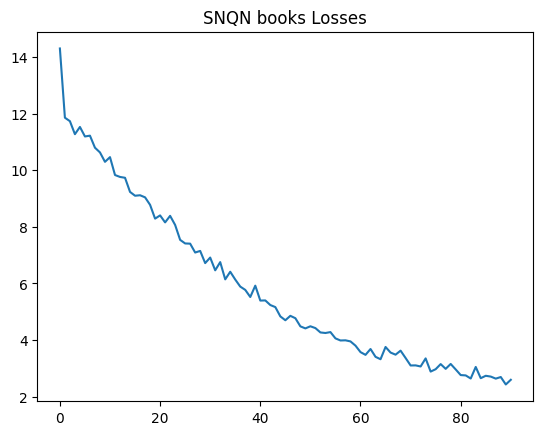

Rewards:
 @5 : 62.400000000000034 @10 : 72.60000000000005 @15 : 79.20000000000006 @20 : 81.00000000000007

Click HR:
 @5 : 0.006466784244562022 @10 : 0.00823045267489712 @15 : 0.010582010582010581 @20 : 0.011757789535567314

Click NDCG:
 @5 : 0.004009016169414662 @10 : 0.004556132921840339 @15 : 0.0051694181128375365 @20 : 0.005446648747037552

Purchase HR:
 @5 : 0.024555461473327687 @10 : 0.0283657917019475 @15 : 0.03048264182895851 @20 : 0.03090601185436071

Purchase NDCG:
 @5 : 0.017970433136167585 @10 : 0.019266268825934997 @15 : 0.01981561281640838 @20 : 0.019917142226471094


In [34]:
arg_dict_books = {'r_click' : 0.2,
            'r_buy' : 1,
            'r_negative' : 1,
            'hidden_factor' : 64,
            'lr' : 0.005,
            'epoch' : 30,
            'batch_size' : 256,
            'neg' : 10,
            'discount' : 0.5
            }
results_books = []
losses_books = []
QN_1_books, QN_2_books = train(books_data_stats, books_replay_buf, books_val_df, arg_dict=arg_dict_books, results=results_books, losses=losses_books, configuration='SNQN')
plt.plot(losses_books)
plt.title('SNQN books Losses')
plt.show()
_ = last_results(results_books, print_out=True)


### SA2C

/Users/kostaseckar/Desktop/HSE/RL_based_RecSys_clone/MY/RL_RECSYS.py:95: UserWarning: `tf.layers.dropout` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dropout` instead.
  self.seq = tf.compat.v1.layers.dropout(self.seq,
/Users/kostaseckar/Desktop/HSE/RL_based_RecSys_clone/MY/SASRecModules.py:142: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  Q = tf.compat.v1.layers.dense(queries, num_units, activation=None) # (N, T_q, C)
/Users/kostaseckar/Desktop/HSE/RL_based_RecSys_clone/MY/SASRecModules.py:143: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  K = tf.compat.v1.layers.dense(keys, num_units, activation=None) # (N, T_k, C)
/Users/kostaseckar/Desktop/HSE/RL_based_RecSys_clone/MY/SASRecModules.py:144: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version.

#############################################################
total clicks: 3402, total purchase:2362
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 5: 0.200000
clicks hr ndcg @ 5 : 0.000294, 0.000294
purchase hr and ndcg @5 : 0.000000, 0.000000
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 10: 0.400000
clicks hr ndcg @ 10 : 0.000588, 0.000392
purchase hr and ndcg @10 : 0.000000, 0.000000
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 15: 0.400000
clicks hr ndcg @ 15 : 0.000588, 0.000392
purchase hr and ndcg @15 : 0.000000, 0.000000
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
cumulative reward @ 20: 0.600000
clicks hr ndcg @ 20 : 0.000882, 0.000459
purchase hr and ndcg @20 : 0.000000, 0.000000
off-line corrected evaluation (click_ng,purchase_ng) @10: 0.000612, 0.000000
#############################################################
the loss in 50th batch is: 14.2458

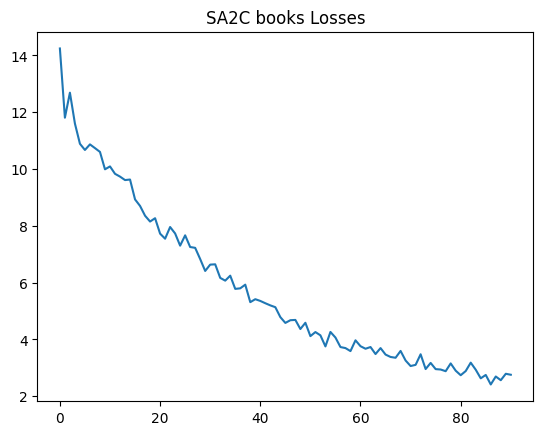

Rewards:
 @5 : 61.00000000000003 @10 : 73.00000000000004 @15 : 76.00000000000004 @20 : 83.00000000000006

Click HR:
 @5 : 0.007348618459729571 @10 : 0.008818342151675485 @15 : 0.008818342151675485 @20 : 0.0102880658436214

Click NDCG:
 @5 : 0.0050007095034587685 @10 : 0.005501292951525018 @15 : 0.005501292951525018 @20 : 0.005845351190943401

Purchase HR:
 @5 : 0.023708721422523286 @10 : 0.0283657917019475 @15 : 0.029635901778154106 @20 : 0.03217612193056731

Purchase NDCG:
 @5 : 0.017912488086611576 @10 : 0.01947178928797253 @15 : 0.019791839256139258 @20 : 0.020392488219085


In [35]:
arg_dict_books = {'r_click' : 0.2,
            'r_buy' : 1,
            'r_negative' : 1,
            'hidden_factor' : 64,
            'lr' : 0.005,
            'lr2' : 0.001,
            'epoch' : 30,
            'batch_size' : 256,
            'neg' : 10,
            'discount' : 0.5,
            'smooth' : 0.0,
            'clip' : 0.0
            }
results_books = []
losses_books = []
QN_1_books, QN_2_books = train(books_data_stats, books_replay_buf, books_val_df, arg_dict=arg_dict_books, results=results_books, losses=losses_books, configuration='SA2C')
plt.plot(losses_books)
plt.title('SA2C books Losses')
plt.show()
_ = last_results(results_books, print_out=True)
